In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\TANU SHREE\AppData\Local\Temp\ipykernel_1792\4099746685.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../combined.csv')

df.columns = ["date", "qty"]
df['date'] = pd.to_datetime(df['date'])

In [3]:
df.sort_values('date', inplace=True)

train_data = df[(df['date'].dt.year >= 2018) & (df['date'].dt.year <= 2021)]
test_data = df[df['date'].dt.year == 2022]

In [4]:

model = ARIMA(train_data['qty'], order=(5,1,0))  
arima_model = model.fit()

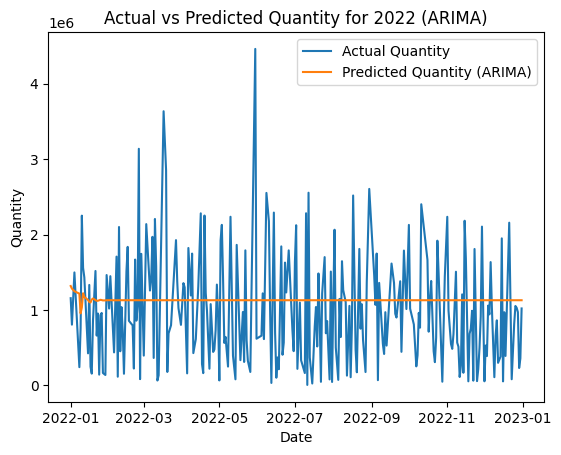

In [5]:

predictions_2022 = arima_model.forecast(steps=len(test_data))

plt.plot(test_data['date'], test_data['qty'], label='Actual Quantity')
plt.plot(test_data['date'], predictions_2022, label='Predicted Quantity (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Quantity for 2022 (ARIMA)')
plt.legend()
plt.show()

In [6]:
mse_2022 = mean_squared_error(test_data['qty'], predictions_2022)
print("Mean Squared Error (2022):", mse_2022)


Mean Squared Error (2022): 555933899085.4398


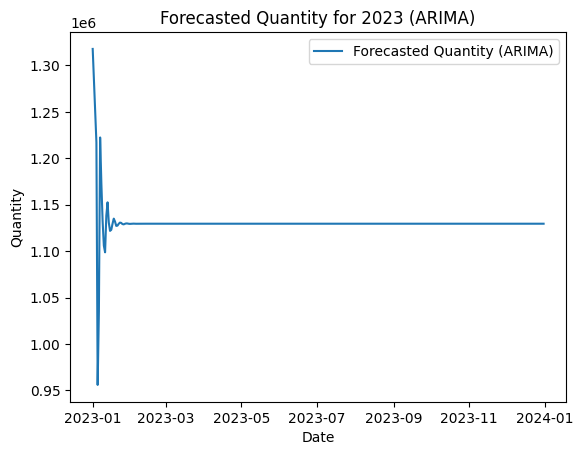

In [8]:

forecast_start_2023 = '2023-01-01'
forecast_end_2023 = '2023-12-31'
forecast_dates_2023 = pd.date_range(start=forecast_start_2023, end=forecast_end_2023, freq='D')
forecast_2023 = arima_model.forecast(steps=len(forecast_dates_2023))

plt.plot(forecast_dates_2023, forecast_2023, label='Forecasted Quantity (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Forecasted Quantity for 2023 (ARIMA)')
plt.legend()
plt.show()